In [11]:
import math
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [12]:
df=pd.read_csv("training.csv")

In [13]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost;;;;;;;;;;;;
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D;SEDAN;EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533;;;;;;;;;
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS;V6;2.7L;V6;M,SXT,4D;SEDAN;SXT;FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630;;;;;
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D;WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693;;;;;;;;;;;
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR;FWD;V6;3.9L,S,PASSENGER;3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633;;;;;;;;
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN;&;COUNTRY;FWD;V,Bas,MINIVAN;3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623;;;;;;;


In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale
RefId,1,0.0262494,0.0123055,-0.0273869,0.0139702,-0.0247749,-0.0100611,-0.0142508,-0.0307017,-0.0329649,-0.00693426,-0.0114158,-0.0203136,-0.0232342,0.0355186,0.135599,-0.0115886,-0.0477706
IsBadBuy,0.0262494,1,-0.156926,0.165325,-0.0476933,0.0828581,-0.105793,-0.0993145,-0.0845135,-0.0807117,-0.10613,-0.101036,-0.100786,-0.0971951,-0.0594116,0.00639286,-0.0981321,-0.0039694
VehYear,0.0123055,-0.156926,1,-0.958049,0.261366,-0.283569,0.582416,0.533807,0.582414,0.540206,0.591968,0.549345,0.599415,0.559579,0.281799,0.0699759,0.349672,0.0573158
VehicleAge,-0.0273869,0.165325,-0.958049,1,-0.252018,0.318778,-0.567106,-0.519897,-0.462299,-0.427526,-0.576914,-0.533646,-0.505322,-0.47064,-0.269907,-0.0766166,-0.311903,-0.0246593
WheelTypeID,0.0139702,-0.0476933,0.261366,-0.252018,1,-0.212432,-0.0946579,-0.129608,-0.0717364,-0.101796,-0.0867982,-0.120046,-0.0726838,-0.10125,0.189817,0.0078462,-0.160986,-0.0113645
VehOdo,-0.0247749,0.0828581,-0.283569,0.318778,-0.212432,1,-0.0183812,0.0237172,0.0291065,0.0614072,-0.0301414,0.010755,0.0137187,0.0460697,-0.29223,-0.0535469,-0.0644356,0.0309944
MMRAcquisitionAuctionAveragePrice,-0.0100611,-0.105793,0.582416,-0.567106,-0.0946579,-0.0183812,1,0.990218,0.910185,0.909832,0.937482,0.931919,0.87122,0.870424,0.108806,0.047112,0.789354,0.0380292
MMRAcquisitionAuctionCleanPrice,-0.0142508,-0.0993145,0.533807,-0.519897,-0.129608,0.0237172,0.990218,1,0.902339,0.917934,0.923144,0.931599,0.860055,0.870604,0.0628181,0.0418103,0.781123,0.0378963
MMRAcquisitionRetailAveragePrice,-0.0307017,-0.0845135,0.582414,-0.462299,-0.0717364,0.0291065,0.910185,0.902339,1,0.990085,0.85133,0.848776,0.912747,0.905523,0.107988,0.0364019,0.745718,0.0797667
MMRAcquisitonRetailCleanPrice,-0.0329649,-0.0807117,0.540206,-0.427526,-0.101796,0.0614072,0.909832,0.917934,0.990085,1,0.846393,0.854986,0.90268,0.906231,0.0698573,0.0321199,0.744622,0.0767349


In [5]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

In [6]:
df.isnull().any()


RefId                                False
IsBadBuy                             False
PurchDate                            False
Auction                              False
VehYear                              False
VehicleAge                           False
Make                                 False
Model                                False
Trim                                  True
SubModel                              True
Color                                 True
Transmission                          True
WheelTypeID                           True
WheelType                             True
VehOdo                               False
Nationality                           True
Size                                  True
TopThreeAmericanName                  True
MMRAcquisitionAuctionAveragePrice     True
MMRAcquisitionAuctionCleanPrice       True
MMRAcquisitionRetailAveragePrice      True
MMRAcquisitonRetailCleanPrice         True
MMRCurrentAuctionAveragePrice         True
MMRCurrentA

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 34 columns):
RefId                                58386 non-null int64
IsBadBuy                             58386 non-null int64
PurchDate                            58386 non-null object
Auction                              58386 non-null object
VehYear                              58386 non-null int64
VehicleAge                           58386 non-null int64
Make                                 58386 non-null object
Model                                58386 non-null object
Trim                                 56475 non-null object
SubModel                             58379 non-null object
Color                                58379 non-null object
Transmission                         58378 non-null object
WheelTypeID                          55813 non-null float64
WheelType                            55809 non-null object
VehOdo                               58386 non-null int64
Nationalit

In [8]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale
count,58386.000000,58386.000000,58386.000000,58386.000000,55813.000000,58386.000000,58373.000000,58373.000000,58373.000000,58373.000000,58141.000000,58141.000000,58141.000000,58141.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,36567.888449,0.123454,2005.344637,4.174956,1.495566,71478.090518,6128.127953,7372.912699,8497.288558,9851.768061,6131.666655,7389.958652,8776.065118,10145.227034,26359.191519,58125.258195,6730.008335,0.025674
std,21092.254801,0.328961,1.733307,1.713833,0.520802,14591.224550,2456.632611,2715.506462,3151.106237,3378.839613,2432.171539,2682.310828,3086.373733,3304.637060,25804.795573,26146.806098,1762.075265,0.158162
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000
25%,18270.250000,0.000000,2004.000000,3.000000,1.000000,61785.000000,4273.000000,5409.000000,6279.000000,7501.000000,4275.000000,5415.000000,6538.000000,7788.000000,17212.000000,32124.000000,5430.000000,0.000000
50%,36608.500000,0.000000,2005.000000,4.000000,1.000000,73359.000000,6097.000000,7308.000000,8448.000000,9798.000000,6063.000000,7311.000000,8733.000000,10103.000000,19662.000000,74135.000000,6700.000000,0.000000
75%,54811.500000,0.000000,2007.000000,5.000000,2.000000,82427.000000,7765.000000,9017.000000,10652.000000,12084.000000,7737.000000,9014.000000,10910.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,36485.000000,1.000000


In [9]:
df[df['AUCGUART'] == 'RED']['AUCGUART']

2105     RED
3252     RED
3447     RED
3695     RED
3824     RED
4237     RED
4752     RED
7264     RED
7565     RED
9299     RED
9986     RED
10648    RED
10702    RED
11163    RED
11352    RED
12705    RED
12898    RED
14648    RED
14770    RED
15106    RED
15468    RED
16044    RED
19409    RED
22536    RED
24290    RED
24390    RED
24846    RED
26495    RED
28907    RED
29279    RED
        ... 
30589    RED
30980    RED
34707    RED
34800    RED
35094    RED
35576    RED
37297    RED
39916    RED
40068    RED
40816    RED
42917    RED
43132    RED
43586    RED
44125    RED
44911    RED
45175    RED
45451    RED
45774    RED
46083    RED
47552    RED
48106    RED
48412    RED
51770    RED
52348    RED
55965    RED
56439    RED
56648    RED
57245    RED
57512    RED
57560    RED
Name: AUCGUART, Length: 62, dtype: object

In [10]:
df[df['AUCGUART'] == 'GREEN']['AUCGUART']

40       GREEN
59       GREEN
96       GREEN
100      GREEN
139      GREEN
199      GREEN
227      GREEN
346      GREEN
485      GREEN
531      GREEN
536      GREEN
550      GREEN
592      GREEN
626      GREEN
631      GREEN
676      GREEN
682      GREEN
701      GREEN
712      GREEN
732      GREEN
741      GREEN
757      GREEN
780      GREEN
814      GREEN
820      GREEN
843      GREEN
850      GREEN
884      GREEN
900      GREEN
932      GREEN
         ...  
57711    GREEN
57724    GREEN
57733    GREEN
57736    GREEN
57823    GREEN
57842    GREEN
57843    GREEN
57848    GREEN
57904    GREEN
57941    GREEN
57977    GREEN
57987    GREEN
58001    GREEN
58011    GREEN
58067    GREEN
58074    GREEN
58086    GREEN
58087    GREEN
58104    GREEN
58110    GREEN
58154    GREEN
58209    GREEN
58221    GREEN
58226    GREEN
58236    GREEN
58240    GREEN
58257    GREEN
58314    GREEN
58317    GREEN
58363    GREEN
Name: AUCGUART, Length: 2621, dtype: object

In [11]:
df[df['AUCGUART'] == 'YELLOW']['AUCGUART']

Series([], Name: AUCGUART, dtype: object)

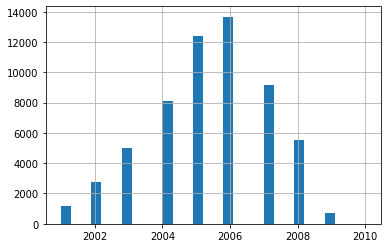

In [12]:
df['VehYear'].hist(bins=30)
plt.show()

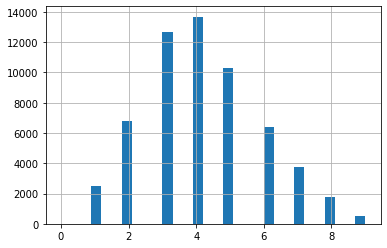

In [13]:
df['VehicleAge'].hist(bins=30)
plt.show()

In [14]:
pclass_xt = pd.crosstab(df['VNST'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
VNST,,
AL,480,68
AR,42,14
AZ,4395,571
CA,4916,757
CO,3556,496
FL,7411,906
GA,1749,216
IA,337,61
ID,150,12


In [15]:
pclass_xt = pd.crosstab(df['VNZIP1'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
VNZIP1,,
2764,9,2
3106,73,7
8505,225,36
12552,4,0
16066,6,0
16137,2,0
17028,29,0
17406,104,14
17545,80,32


In [16]:
df['Make'].value_counts()

CHEVROLET       13842
DODGE           10355
FORD             9000
CHRYSLER         7093
PONTIAC          3421
KIA              2006
SATURN           1698
NISSAN           1687
HYUNDAI          1444
JEEP             1287
SUZUKI           1062
TOYOTA            905
MITSUBISHI        822
MAZDA             774
MERCURY           739
BUICK             562
GMC               502
HONDA             407
OLDSMOBILE        198
ISUZU             110
VOLKSWAGEN        104
SCION             102
LINCOLN            80
INFINITI           36
VOLVO              31
LEXUS              27
CADILLAC           25
ACURA              25
SUBARU             22
MINI               17
PLYMOUTH            1
HUMMER              1
TOYOTA;SCION        1
Name: Make, dtype: int64

In [17]:
pclass_xt = pd.crosstab(df['VehicleAge'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
VehicleAge,,
0,1,0
1,2400,109
2,6328,442
3,11653,1050
4,12192,1492
5,8777,1526
6,5246,1136
7,2925,799
8,1299,501


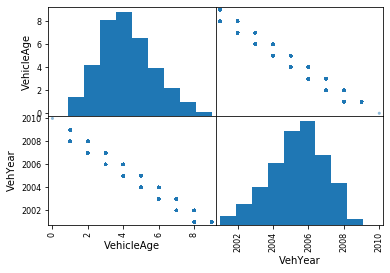

In [18]:
pd.plotting.scatter_matrix(df[['VehicleAge', 'VehYear']])
plt.show()

In [19]:
df['Model'].value_counts()

PT;CRUISER              1845
IMPALA                  1616
TAURUS                  1154
CALIBER                 1108
CARAVAN;GRAND;FWD;V6    1021
MALIBU;4C                991
SEBRING;4C               941
TAURUS;3.0L;V6;EFI       917
PT;CRUISER;2.4L;I4;S     909
COBALT                   900
1500;RAM;PICKUP;2WD      880
IMPALA;V6                857
STRATUS;V6;2.7L;V6;M     792
GRAND;PRIX               725
FOCUS                    720
GRAND;PRIX;3.8L;V6;S     698
IMPALA;3.5L;V6;SFI       669
MALIBU;4C;2.2L;I4;MP     563
ALTIMA                   559
AVENGER;4C               551
ION                      550
SPECTRA                  544
FORENZA                  519
1500;SILVERADO;PICKU     490
MALIBU;V6                457
HHR                      447
G6;V6                    443
STRATUS;V6               430
UPLANDER;FWD;V6          423
IMPALA;3.4L;V6;SFI       413
                        ... 
STRATUS;V6;2.7L;V6;S       1
SORENTO;2WD;3.8L;V6        1
CAMRY;4C;EI;I-4;2.2L       1
LS;V6;3.0L;V6;

In [20]:
pclass_xt = pd.crosstab(df['Model'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Model,,
1500;RAM;PICKUP;2WD,767,113
1500;RAM;PICKUP;4WD,42,5
1500;SIERRA;PICKUP;2,94,8
1500;SIERRA;PICKUP;4,2,0
1500;SILVERADO;PICKU,451,39
1500HD;SILVERADO;PIC,5,0
2500;RAM;PICKUP;2WD,9,2
2500;RAM;PICKUP;4WD,2,0
2500;SILVERADO;PICKU,2,0


In [21]:
pclass_xt = pd.crosstab(df['Color'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Color,,
BEIGE,1091,173
BLACK,5386,681
BLUE,7311,960
BROWN,304,46
GOLD,3635,609
GREEN,2235,326
GREY,5567,717
MAROON,1422,206
NOT;AVAIL,61,16


In [22]:
df['Transmission'].value_counts()

AUTO      56330
MANUAL     2047
Manual        1
Name: Transmission, dtype: int64

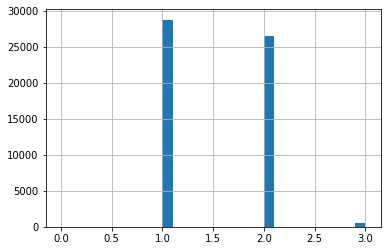

In [23]:
df['WheelTypeID'].hist(bins=30)
plt.show()

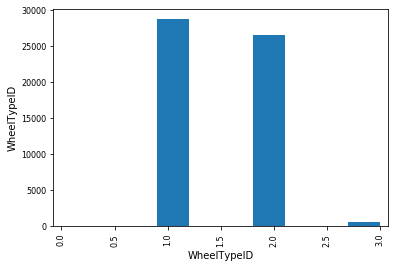

In [24]:
pd.plotting.scatter_matrix(df[['WheelTypeID', 'WheelType']])
plt.show()

In [25]:
pclass_xt = pd.crosstab(df['WheelTypeID'], df['WheelType'])
pclass_xt

WheelType,Alloy,Covers,Special
WheelTypeID,,,
1.0,28735,0,0
2.0,0,26485,0
3.0,0,0,589


In [26]:
pclass_xt = pd.crosstab(df['Auction'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Auction,,
ADESA,9856,1796
MANHEIM,28992,3748
OTHER,12330,1664


In [27]:
pclass_xt = pd.crosstab(df['Make'], df['Model'])
pclass_xt

Model,1500;RAM;PICKUP;2WD,1500;RAM;PICKUP;4WD,1500;SIERRA;PICKUP;2,1500;SIERRA;PICKUP;4,1500;SILVERADO;PICKU,1500HD;SILVERADO;PIC,2500;RAM;PICKUP;2WD,2500;RAM;PICKUP;4WD,2500;SILVERADO;PICKU,2500HD;SIERRA;PICKUP,...,YUKON;4WD;V8;4.8L;V8,YUKON;4WD;V8;5.3L;V8,YUKON;AWD;V8,YUKON;XL;1500;2WD,YUKON;XL;1500;2WD;5.,YUKON;XL;1500;4WD,YUKON;XL;1500;4WD;5.,YUKON;XL;1500;AWD;6.,ZEPHYR,ZEPHYR;3.0L;V6;SFI
Make,,,,,,,,,,,,,,,,,,,,,
ACURA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUICK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CADILLAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEVROLET,0,0,0,0,490,5,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
CHRYSLER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DODGE,880,47,0,0,0,0,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0
FORD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GMC,0,0,102,2,0,0,0,0,0,1,...,2,7,1,13,14,4,3,2,0,0
HONDA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df['Trim'].value_counts()

Bas    11213
LS      8190
SE      7473
SXT     3061
LT      2849
LX      1919
Tou     1828
EX      1703
SEL     1093
XLT     1085
GLS     1083
Spo      999
SLT      946
Lim      761
Lar      697
ST       696
GT       643
XLS      623
2        586
ES       553
S        493
SES      481
ZX4      471
LE       460
SLE      416
i        385
Cla      375
XL       361
Nor      348
GL       327
       ...  
DS         6
GX         6
LW2        6
C          5
SE-        5
Hig        5
Ove        4
Spe        4
XRS        4
ZTW        4
eC         4
Ral        4
250        3
RS         3
Ent        3
ZR2        3
Car        3
T5         2
Dur        2
GXP        2
Hyb        2
XS         2
Out        1
Ult        1
JLX        1
LL         1
Si         1
Maz        1
Xsp        1
JLS        1
Name: Trim, Length: 131, dtype: int64

In [29]:
pclass_xt = pd.crosstab(df['Make'], df['Trim'])
pclass_xt

Trim,1,150,2,250,3,3;R,Adv,Bas,C,CE,...,ZTW,ZX2,ZX3,ZX4,ZX5,ZXW,eC,eL,i,s
Make,,,,,,,,,,,,,,,,,,,,,
ACURA,0,0,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
BUICK,0,0,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
CADILLAC,0,0,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEVROLET,0,217,0,3,0,0,0,2054,0,0,...,0,0,0,0,0,0,0,0,0,0
CHRYSLER,0,0,0,0,0,0,0,3402,5,0,...,0,0,0,0,0,0,0,4,0,0
DODGE,0,0,0,0,0,0,181,1041,0,0,...,0,0,0,0,0,0,4,4,0,0
FORD,0,0,0,0,0,0,0,461,0,0,...,4,8,203,471,74,23,0,0,0,0
GMC,0,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HONDA,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
pclass_xt = pd.crosstab(df['Trim'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Trim,,
1,113,9
150,221,32
2,502,84
250,3,0
3,126,15
3;R,5,1
Adv,165,16
Bas,9825,1388
C,2,3


In [31]:
pclass_xt = pd.crosstab(df['SubModel'], df['Make'])
pclass_xt

Make,ACURA,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FORD,GMC,HONDA,HUMMER,...,PLYMOUTH,PONTIAC,SATURN,SCION,SUBARU,SUZUKI,TOYOTA,TOYOTA;SCION,VOLKSWAGEN,VOLVO
SubModel,,,,,,,,,,,,,,,,,,,,,
2D;CONVERTIBLE,0,0,0,1,142,0,73,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2D;CONVERTIBLE;DREAM;CRUISER,0,0,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;GLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2D;CONVERTIBLE;GT,0,0,0,0,3,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;GTC,0,0,0,0,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;LIMITED,0,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;LX,0,0,0,0,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;LXI,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;SE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [32]:
pclass_xt = pd.crosstab(df['SubModel'], df['Model'])
pclass_xt

Model,1500;RAM;PICKUP;2WD,1500;RAM;PICKUP;4WD,1500;SIERRA;PICKUP;2,1500;SIERRA;PICKUP;4,1500;SILVERADO;PICKU,1500HD;SILVERADO;PIC,2500;RAM;PICKUP;2WD,2500;RAM;PICKUP;4WD,2500;SILVERADO;PICKU,2500HD;SIERRA;PICKUP,...,YUKON;4WD;V8;4.8L;V8,YUKON;4WD;V8;5.3L;V8,YUKON;AWD;V8,YUKON;XL;1500;2WD,YUKON;XL;1500;2WD;5.,YUKON;XL;1500;4WD,YUKON;XL;1500;4WD;5.,YUKON;XL;1500;AWD;6.,ZEPHYR,ZEPHYR;3.0L;V6;SFI
SubModel,,,,,,,,,,,,,,,,,,,,,
2D;CONVERTIBLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;DREAM;CRUISER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;GLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;GT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;GTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;LIMITED,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;LX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;LXI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D;CONVERTIBLE;SE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


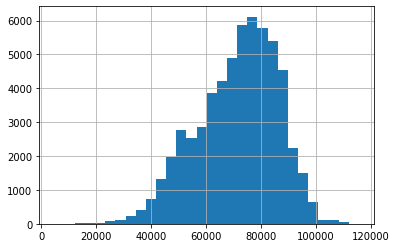

In [33]:
df['VehOdo'].hist(bins=30)
plt.show()

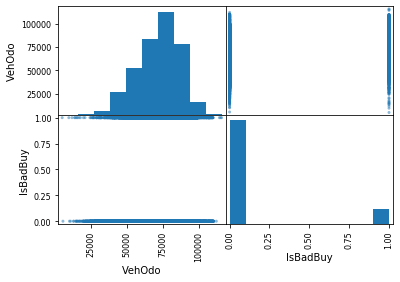

In [34]:
pd.plotting.scatter_matrix(df[['VehOdo', 'IsBadBuy']])
plt.show()

In [35]:
pclass_xt = pd.crosstab(df['VehOdo'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
VehOdo,,
4825,0,1
5368,1,0
9446,0,1
9878,1,0
10643,1,0
11662,0,1
12628,1,0
12926,1,0
13445,0,1


In [36]:
df['Nationality'].value_counts()

AMERICAN          48800
OTHER;ASIAN        6435
TOP;LINE;ASIAN     2995
OTHER               152
Name: Nationality, dtype: int64

In [37]:
pclass_xt = pd.crosstab(df['Nationality'], df['Auction'])
pclass_xt

Auction,ADESA,MANHEIM,OTHER
Nationality,,,
AMERICAN,9483,27224,12093
OTHER,23,107,22
OTHER;ASIAN,1507,3622,1306
TOP;LINE;ASIAN,637,1786,572


In [38]:
pclass_xt = pd.crosstab(df['Nationality'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Nationality,,
AMERICAN,42880,5920
OTHER,131,21
OTHER;ASIAN,5581,854
TOP;LINE;ASIAN,2582,413


In [39]:
df['Size'].value_counts()

MEDIUM         24644
LARGE           7120
MEDIUM;SUV      6398
COMPACT         5764
VAN             4677
LARGE;TRUCK     2554
SMALL;SUV       1805
SPECIALTY       1527
CROSSOVER       1419
LARGE;SUV       1157
SMALL;TRUCK      696
SPORTS           621
Name: Size, dtype: int64

In [40]:
pclass_xt = pd.crosstab(df['Size'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Size,,
COMPACT,4844,920
CROSSOVER,1277,142
LARGE,6456,664
LARGE;SUV,966,191
LARGE;TRUCK,2256,298
MEDIUM,21801,2843
MEDIUM;SUV,5454,944
SMALL;SUV,1556,249
SMALL;TRUCK,593,103


In [41]:
df['TopThreeAmericanName'].value_counts()

GM          20248
CHRYSLER    18733
FORD         9819
OTHER        9582
Name: TopThreeAmericanName, dtype: int64

In [42]:
pclass_xt = pd.crosstab(df['TopThreeAmericanName'], df['Make'])
pclass_xt

Make,ACURA,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FORD,GMC,HONDA,HUMMER,...,PLYMOUTH,PONTIAC,SATURN,SCION,SUBARU,SUZUKI,TOYOTA,TOYOTA;SCION,VOLKSWAGEN,VOLVO
TopThreeAmericanName,,,,,,,,,,,,,,,,,,,,,
CHRYSLER,0,0,0,0,7093,10354,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
FORD,0,0,0,0,0,0,9000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GM,0,562,25,13842,0,0,0,501,0,1,...,0,3421,1698,0,0,0,0,0,0,0
OTHER,25,0,0,0,0,0,0,0,407,0,...,0,0,0,102,22,1062,905,1,104,31


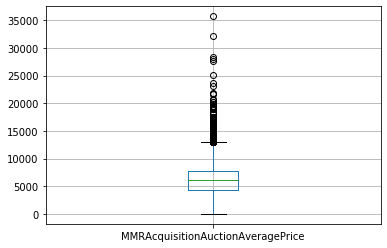

In [43]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionAveragePrice'])

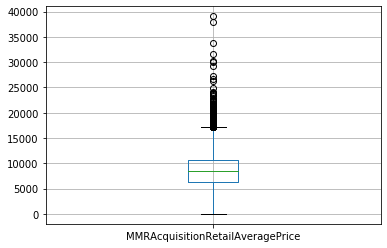

In [44]:
boxplot = df.boxplot(column=['MMRAcquisitionRetailAveragePrice'])

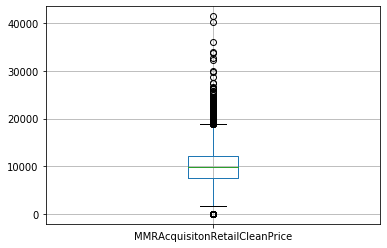

In [45]:
boxplot = df.boxplot(column=['MMRAcquisitonRetailCleanPrice'])

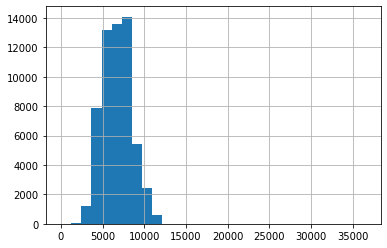

In [46]:
df['VehBCost'].hist(bins=30)
plt.show()

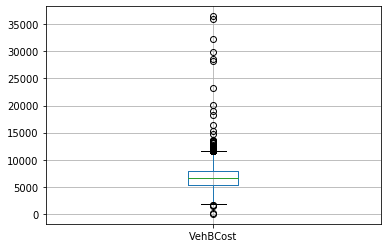

In [47]:
boxplot = df.boxplot(column=['VehBCost'])

In [48]:
df['IsOnlineSale'].value_counts()

0    56887
1     1499
Name: IsOnlineSale, dtype: int64

In [49]:
pclass_xt = pd.crosstab(df['IsOnlineSale'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
IsOnlineSale,,
0,49852,7035
1,1326,173


In [50]:
df['Transmission'].value_counts()

AUTO      56330
MANUAL     2047
Manual        1
Name: Transmission, dtype: int64

In [51]:
df['Color'].value_counts()

SILVER       11812
WHITE         9768
BLUE          8271
GREY          6284
BLACK         6067
RED           5020
GOLD          4244
GREEN         2561
MAROON        1628
BEIGE         1264
BROWN          350
ORANGE         340
PURPLE         294
YELLOW         200
OTHER          199
NOT;AVAIL       77
Name: Color, dtype: int64

In [52]:
df['Auction'].value_counts()

MANHEIM    32740
OTHER      13994
ADESA      11652
Name: Auction, dtype: int64

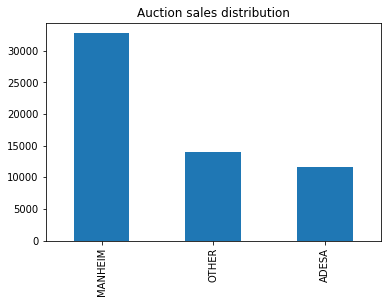

In [53]:
df['Auction'].value_counts().plot(kind='bar', 
                                   title='Auction sales distribution')
plt.show()

In [54]:
pclass_xt = pd.crosstab(df['Auction'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Auction,,
ADESA,9856,1796
MANHEIM,28992,3748
OTHER,12330,1664


In [55]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

IsBadBuy,0,1
Auction,,
ADESA,0.845863,0.154137
MANHEIM,0.885522,0.114478
OTHER,0.881092,0.118908


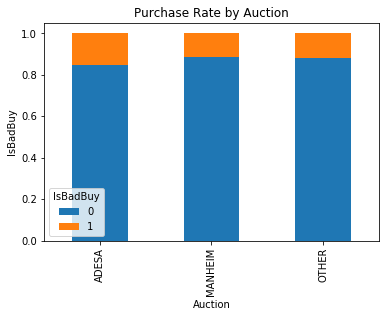

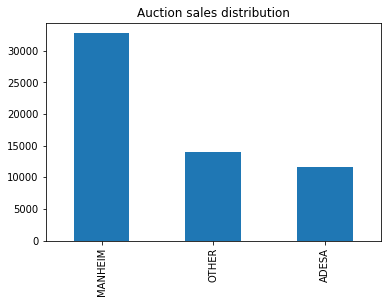

In [56]:
pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='Purchase Rate by Auction')
plt.xlabel('Auction')
plt.ylabel('IsBadBuy')
plt.show()

df['Auction'].value_counts().plot(kind='bar', 
                                   title='Auction sales distribution')
plt.show()

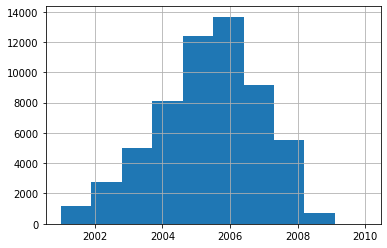

In [57]:
df['VehYear'].hist(bins=10)
plt.show()

In [58]:
df['VehYear'].corr(df['VehicleAge']) 

-0.9580486812465409

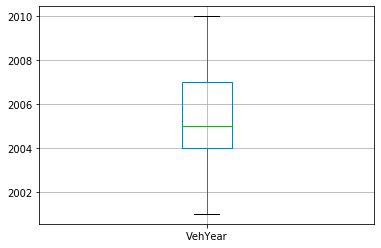

In [59]:
boxplot = df.boxplot(column=['VehYear'])

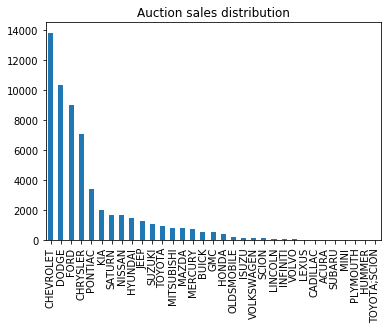

In [60]:
df['Make'].value_counts().plot(kind='bar', 
                                   title='Auction sales distribution')
plt.show()

In [61]:
pclass_xt = pd.crosstab(df['Make'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Make,,
ACURA,16,9
BUICK,478,84
CADILLAC,22,3
CHEVROLET,12486,1356
CHRYSLER,6179,914
DODGE,9285,1070
FORD,7618,1382
GMC,444,58
HONDA,365,42


In [62]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

IsBadBuy,0,1
Make,,
ACURA,0.640000,0.360000
BUICK,0.850534,0.149466
CADILLAC,0.880000,0.120000
CHEVROLET,0.902037,0.097963
CHRYSLER,0.871141,0.128859
DODGE,0.896668,0.103332
FORD,0.846444,0.153556
GMC,0.884462,0.115538
HONDA,0.896806,0.103194


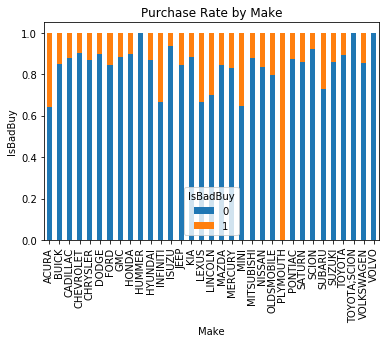

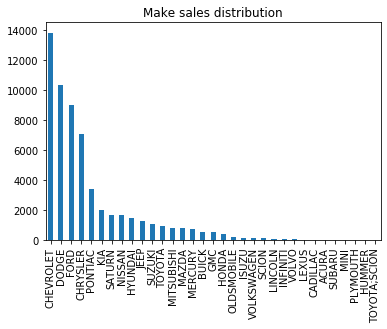

In [63]:
pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='Purchase Rate by Make')
plt.xlabel('Make')
plt.ylabel('IsBadBuy')
plt.show()

df['Make'].value_counts().plot(kind='bar', 
                                   title='Make sales distribution')
plt.show()

In [64]:
df['Model'].value_counts()

PT;CRUISER              1845
IMPALA                  1616
TAURUS                  1154
CALIBER                 1108
CARAVAN;GRAND;FWD;V6    1021
MALIBU;4C                991
SEBRING;4C               941
TAURUS;3.0L;V6;EFI       917
PT;CRUISER;2.4L;I4;S     909
COBALT                   900
1500;RAM;PICKUP;2WD      880
IMPALA;V6                857
STRATUS;V6;2.7L;V6;M     792
GRAND;PRIX               725
FOCUS                    720
GRAND;PRIX;3.8L;V6;S     698
IMPALA;3.5L;V6;SFI       669
MALIBU;4C;2.2L;I4;MP     563
ALTIMA                   559
AVENGER;4C               551
ION                      550
SPECTRA                  544
FORENZA                  519
1500;SILVERADO;PICKU     490
MALIBU;V6                457
HHR                      447
G6;V6                    443
STRATUS;V6               430
UPLANDER;FWD;V6          423
IMPALA;3.4L;V6;SFI       413
                        ... 
STRATUS;V6;2.7L;V6;S       1
SORENTO;2WD;3.8L;V6        1
CAMRY;4C;EI;I-4;2.2L       1
LS;V6;3.0L;V6;

In [65]:
df['SubModel'].value_counts()

4D;SEDAN                          12234
4D;SEDAN;LS                        3828
4D;SEDAN;SE                        3111
4D;WAGON                           1795
MINIVAN;3.3L                        996
4D;SUV;4.2L;LS                      931
4D;SEDAN;LT                         921
4D;SEDAN;SXT;FFV                    869
2D;COUPE                            850
4D;SEDAN;LX                         847
4D;SEDAN;EX                         757
4D;SEDAN;LT;3.5L                    698
4D;SEDAN;SEL                        667
4D;SPORT                            527
4D;SEDAN;LEVEL;2                    512
4D;SEDAN;LS;3.5L;FFV                446
4D;SEDAN;SE1                        442
4D;SEDAN;ES                         414
4D;SEDAN;S                          414
4D;SUV;4.2L                         411
4D;SEDAN;GT                         401
4D;SUV                              394
4D;SEDAN;GLS                        384
4D;SEDAN;CLASSIC                    375
4D;SUV;4.7L                         365


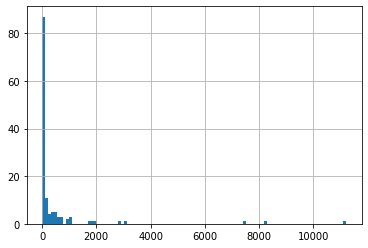

In [66]:
df['Trim'].value_counts().hist(bins=100)

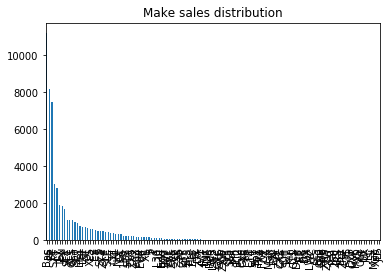

In [67]:
df['Trim'].value_counts().plot(kind='bar', 
                                   title='Make sales distribution')
plt.show()

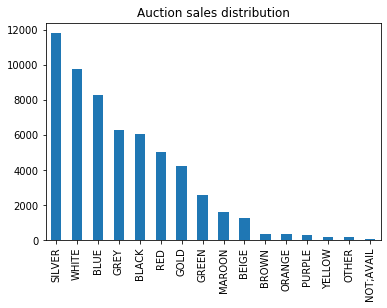

In [68]:
df['Color'].value_counts().plot(kind='bar', 
                                   title='Auction sales distribution')
plt.show()

In [69]:
pclass_xt = pd.crosstab(df['Color'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
Color,,
BEIGE,1091,173
BLACK,5386,681
BLUE,7311,960
BROWN,304,46
GOLD,3635,609
GREEN,2235,326
GREY,5567,717
MAROON,1422,206
NOT;AVAIL,61,16


In [70]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

IsBadBuy,0,1
Color,,
BEIGE,0.863133,0.136867
BLACK,0.887753,0.112247
BLUE,0.883932,0.116068
BROWN,0.868571,0.131429
GOLD,0.856503,0.143497
GREEN,0.872706,0.127294
GREY,0.885901,0.114099
MAROON,0.873464,0.126536
NOT;AVAIL,0.792208,0.207792


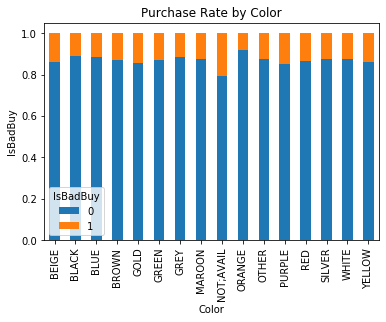

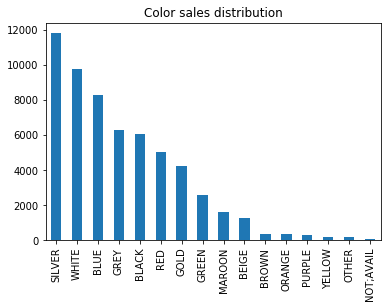

In [71]:
pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='Purchase Rate by Color')
plt.xlabel('Color')
plt.ylabel('IsBadBuy')
plt.show()

df['Color'].value_counts().plot(kind='bar', 
                                   title='Color sales distribution')
plt.show()

In [72]:
df['Transmission'].value_counts()

AUTO      56330
MANUAL     2047
Manual        1
Name: Transmission, dtype: int64

In [73]:
pclass_xt = pd.crosstab(df['WheelTypeID'], df['WheelType'])
pclass_xt

WheelType,Alloy,Covers,Special
WheelTypeID,,,
1.0,28735,0,0
2.0,0,26485,0
3.0,0,0,589


In [74]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

WheelType,Alloy,Covers,Special
WheelTypeID,,,
1.0,1.0,0.0,0.0
2.0,0.0,1.0,0.0
3.0,0.0,0.0,1.0


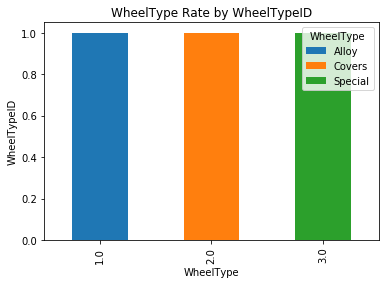

In [75]:
pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='WheelType Rate by WheelTypeID')
plt.xlabel('WheelType')
plt.ylabel('WheelTypeID')
plt.show()

In [76]:
df[df['WheelType'].isnull()]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost;;;;;;;;;;;;
66,18077,1,8/19/2010,OTHER,2005,5,FORD,MUSTANG;V6,Bas,2D;COUPE,...,11679.0,12880.0,NaN,NaN,1235,84104,UT,8410.0,1,803;;;;;;;;;;
71,14720,0,11/4/2009,OTHER,2002,7,CHEVROLET,TRAILBLAZER;2WD;6C,LS,4D;SUV;4.2L;LS,...,7867.0,9649.0,NaN,NaN,18880,29697,SC,7000.0,0,1641;;;;;;
92,26100,1,11/3/2010,OTHER,2005,5,PONTIAC,VIBE,Bas,4D;WAGON,...,8196.0,9421.0,NaN,NaN,52598,29697,SC,5850.0,0,594;;;;;;;;;;;
124,13328,1,2/3/2009,MANHEIM,2005,4,FORD,FOCUS;2.0L;I-4;SFI;D,ZX4,4D;SEDAN;ZX4,...,4461.0,5597.0,NaN,NaN,20740,21075,MD,4675.0,0,1243;;;;;;
125,4369,1,12/7/2010,OTHER,2003,7,FORD,F150;PICKUP;2WD;V6,XL,EXT;CAB;4.2L;W/T,...,7557.0,9617.0,NaN,NaN,52644,75061,TX,7165.0,0,920;;;;;
143,14704,1,10/28/2009,OTHER,2004,5,DODGE,NEON;2.0L;I4;SFI,SE,4D;SEDAN,...,3357.0,4481.0,NaN,NaN,18880,29697,SC,4600.0,0,686;;;;;;;;
145,37619,0,7/20/2010,MANHEIM,2008,2,DODGE,AVENGER;V6,SE,4D;SEDAN,...,11006.0,11868.0,NaN,NaN,8172,30331,GA,8545.0,0,1373;;;;;;;;;;
146,23934,1,1/14/2009,OTHER,2005,4,CHEVROLET,TRAILBLAZER;4WD;6C;4,LS,4D;SUV;4.2L;LS,...,8841.0,10595.0,NaN,NaN,18880,29697,SC,7200.0,0,1703;;;;;
165,66769,1,5/27/2010,ADESA,2004,6,NISSAN,PATHFINDER;4WD;V6,LE,4D;SPORT;UTILITY;LE,...,11059.0,12475.0,NaN,NaN,17675,28273,NC,7900.0,0,1341;;;;
183,25022,1,2/10/2009,OTHER,2005,4,CHEVROLET,IMPALA;3.4L;V6;SFI,Bas,4D;SEDAN,...,6140.0,7502.0,NaN,NaN,8655,35613,AL,6125.0,0,1703;;;;;;;;


In [77]:
df['WheelType'].mode()[0]

'Alloy'

In [78]:
embarked_locs = sorted(df['WheelTypeID'].unique())
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, nan: 4}

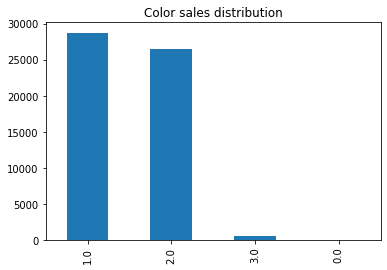

In [79]:
df['WheelTypeID'].value_counts().plot(kind='bar', 
                                   title='Color sales distribution')
plt.show()

In [80]:
df['WheelTypeIDVV'] = df['WheelTypeID'].map(embarked_locs_mapping).astype(int)
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost;;;;;;;;;;;;,WheelTypeIDVV
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D;SEDAN;EX,...,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533;;;;;;;;;,2
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS;V6;2.7L;V6;M,SXT,4D;SEDAN;SXT;FFV,...,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630;;;;;,2
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D;WAGON,...,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693;;;;;;;;;;;,2
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR;FWD;V6;3.9L,S,PASSENGER;3.9L,...,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633;;;;;;;;,2
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN;&;COUNTRY;FWD;V,Bas,MINIVAN;3.3L,...,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623;;;;;;;,1


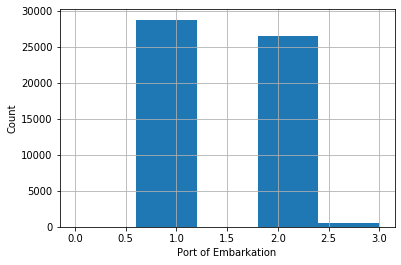

In [81]:
df['WheelTypeIDVV'].hist(bins=len(embarked_locs), range=(0, 3))
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

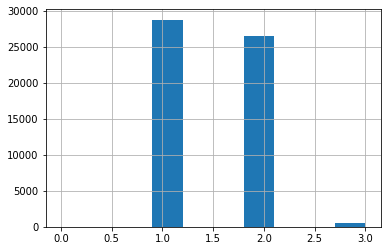

In [82]:
df['WheelTypeID'].hist(bins=10)
plt.show()

In [83]:
df['WheelTypeID'].mode()[0]

1.0

In [84]:
WheelTypeID_locs = sorted(df['WheelTypeID'].unique())
WheelTypeID_locs_mapping = dict(zip(WheelTypeID_locs, range(0, len(WheelTypeID_locs) + 1)))
WheelTypeID_locs_mapping

{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, nan: 4}

In [85]:
df['WheelTypeIDVV'] = df['WheelTypeID'].map(WheelTypeID_locs_mapping).astype(int)
df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost;;;;;;;;;;;;,WheelTypeIDVV
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D;SEDAN;EX,...,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533;;;;;;;;;,2
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS;V6;2.7L;V6;M,SXT,4D;SEDAN;SXT;FFV,...,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630;;;;;,2
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D;WAGON,...,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693;;;;;;;;;;;,2
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR;FWD;V6;3.9L,S,PASSENGER;3.9L,...,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633;;;;;;;;,2
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN;&;COUNTRY;FWD;V,Bas,MINIVAN;3.3L,...,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623;;;;;;;,1
5,62522,0,4/22/2009,ADESA,2007,2,KIA,SPECTRA;2.0L;I4;EFI,EX,4D;SEDAN;EX,...,6143.0,NaN,NaN,21053,85226,AZ,5430.0,0,462;;;;;;,2
6,1653,0,5/21/2010,ADESA,2005,5,NISSAN,ALTIMA,Bas,4D;SEDAN,...,11377.0,NaN,NaN,5546,34203,FL,7675.0,0,723;;;;;;;;;,2
7,40878,0,9/24/2009,MANHEIM,2008,1,DODGE,AVENGER;4C;2.4L;I4;S,SE,4D;SEDAN,...,12554.0,NaN,NaN,99740,29532,SC,7810.0,0,920;;;;;;;,2
8,55149,0,7/6/2010,MANHEIM,2006,4,SUZUKI,FORENZA,NaN,4D;SEDAN,...,8216.0,NaN,NaN,20234,97217,OR,5870.0,0,462;;;;;;;;;;,2
9,7255,0,6/4/2009,MANHEIM,2006,3,SUZUKI,FORENZA;2.0L;I4;EFI,NaN,4D;SEDAN,...,5756.0,NaN,NaN,18880,30272,GA,4825.0,0,505;;;;;;;,2


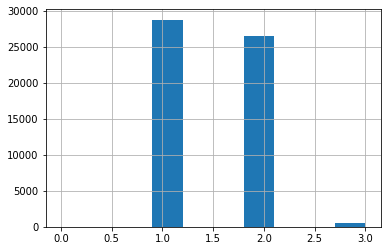

In [86]:
df['WheelTypeID'].hist(bins=10)
plt.show()

In [87]:
df['WheelTypeID'].fillna(99)

0         2.0
1         2.0
2         2.0
3         2.0
4         1.0
5         2.0
6         2.0
7         2.0
8         2.0
9         2.0
10        2.0
11        1.0
12        1.0
13        1.0
14        2.0
15        2.0
16        1.0
17        2.0
18        1.0
19        2.0
20        2.0
21        1.0
22        1.0
23        2.0
24        2.0
25        2.0
26        1.0
27        1.0
28        1.0
29        2.0
         ... 
58356     2.0
58357     1.0
58358     2.0
58359     1.0
58360     1.0
58361     1.0
58362     1.0
58363     1.0
58364     1.0
58365     2.0
58366    99.0
58367     1.0
58368     1.0
58369     1.0
58370     1.0
58371     2.0
58372     1.0
58373     1.0
58374     2.0
58375     1.0
58376     1.0
58377     2.0
58378     1.0
58379     2.0
58380     2.0
58381     1.0
58382     1.0
58383     2.0
58384     1.0
58385     2.0
Name: WheelTypeID, Length: 58386, dtype: float64

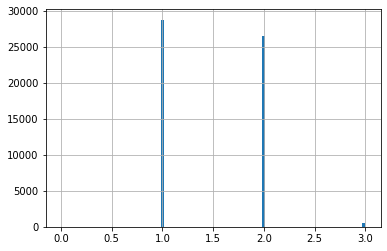

In [88]:
df['WheelTypeID'].hist(bins=100)
plt.show()

In [89]:
df['Trim'].mode()[0]

'Bas'

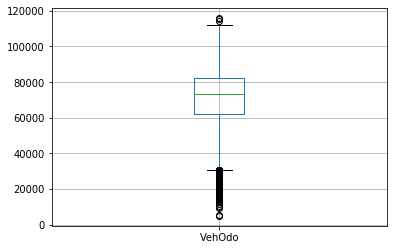

In [90]:
boxplot = df.boxplot(column=['VehOdo'])

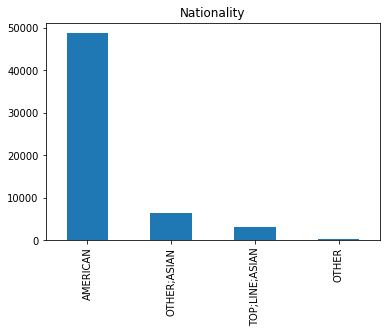

In [91]:
df['Nationality'].value_counts().plot(kind='bar', 
                                   title='Nationality')
plt.show()

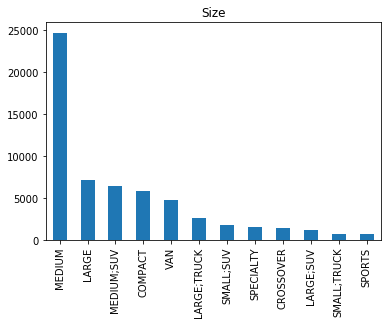

In [92]:
df['Size'].value_counts().plot(kind='bar', 
                                   title='Size')
plt.show()

In [93]:
pclass_xt = pd.crosstab(df['Model'], df['Size'])
pclass_xt

Size,COMPACT,CROSSOVER,LARGE,LARGE;SUV,LARGE;TRUCK,MEDIUM,MEDIUM;SUV,SMALL;SUV,SMALL;TRUCK,SPECIALTY,SPORTS,VAN
Model,,,,,,,,,,,,
1500;RAM;PICKUP;2WD,0,0,0,0,880,0,0,0,0,0,0,0
1500;RAM;PICKUP;4WD,0,0,0,0,47,0,0,0,0,0,0,0
1500;SIERRA;PICKUP;2,0,0,0,0,102,0,0,0,0,0,0,0
1500;SIERRA;PICKUP;4,0,0,0,0,2,0,0,0,0,0,0,0
1500;SILVERADO;PICKU,0,0,0,0,490,0,0,0,0,0,0,0
1500HD;SILVERADO;PIC,0,0,0,0,5,0,0,0,0,0,0,0
2500;RAM;PICKUP;2WD,0,0,0,0,11,0,0,0,0,0,0,0
2500;RAM;PICKUP;4WD,0,0,0,0,2,0,0,0,0,0,0,0
2500;SILVERADO;PICKU,0,0,0,0,2,0,0,0,0,0,0,0


In [94]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

Size,COMPACT,CROSSOVER,LARGE,LARGE;SUV,LARGE;TRUCK,MEDIUM,MEDIUM;SUV,SMALL;SUV,SMALL;TRUCK,SPECIALTY,SPORTS,VAN
Model,,,,,,,,,,,,
1500;RAM;PICKUP;2WD,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1500;RAM;PICKUP;4WD,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1500;SIERRA;PICKUP;2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1500;SIERRA;PICKUP;4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1500;SILVERADO;PICKU,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1500HD;SILVERADO;PIC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2500;RAM;PICKUP;2WD,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2500;RAM;PICKUP;4WD,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2500;SILVERADO;PICKU,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


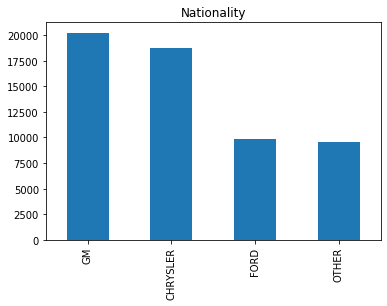

In [95]:
df['TopThreeAmericanName'].value_counts().plot(kind='bar', 
                                   title='Nationality')
plt.show()

In [96]:
pclass_xt = pd.crosstab(df['Make'], df['TopThreeAmericanName'])
pclass_xt

TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
Make,,,,
ACURA,0,0,0,25
BUICK,0,0,562,0
CADILLAC,0,0,25,0
CHEVROLET,0,0,13842,0
CHRYSLER,7093,0,0,0
DODGE,10354,0,0,0
FORD,0,9000,0,0
GMC,0,0,501,0
HONDA,0,0,0,407


In [97]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
Make,,,,
ACURA,0.0,0.0,0.0,1.0
BUICK,0.0,0.0,1.0,0.0
CADILLAC,0.0,0.0,1.0,0.0
CHEVROLET,0.0,0.0,1.0,0.0
CHRYSLER,1.0,0.0,0.0,0.0
DODGE,1.0,0.0,0.0,0.0
FORD,0.0,1.0,0.0,0.0
GMC,0.0,0.0,1.0,0.0
HONDA,0.0,0.0,0.0,1.0


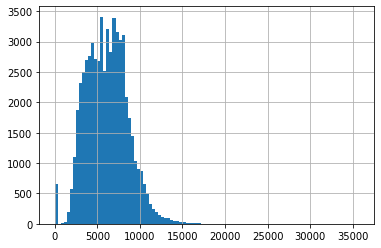

In [98]:
df['MMRAcquisitionAuctionAveragePrice'].hist(bins=100)
plt.show()

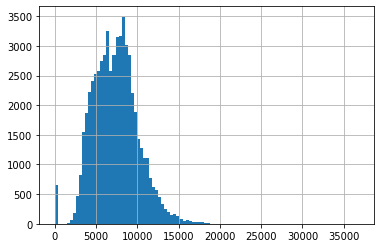

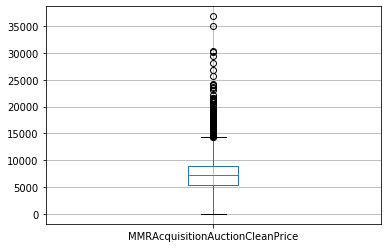

In [99]:
df['MMRAcquisitionAuctionCleanPrice'].hist(bins=100)
plt.show()

boxplot = df.boxplot(column=['MMRAcquisitionAuctionCleanPrice'])

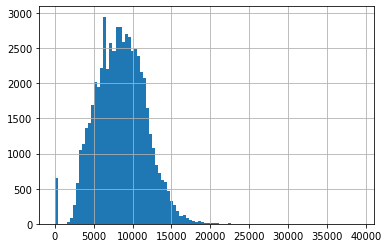

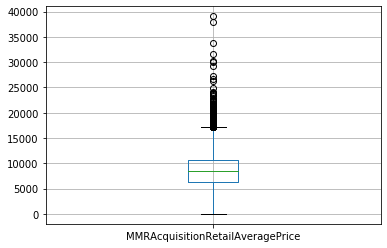

In [100]:
df['MMRAcquisitionRetailAveragePrice'].hist(bins=100)
plt.show()

boxplot = df.boxplot(column=['MMRAcquisitionRetailAveragePrice'])

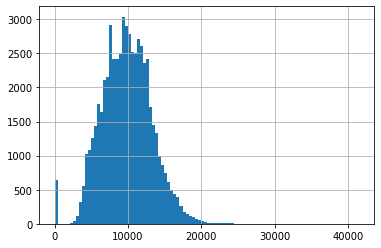

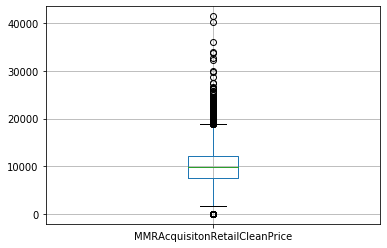

In [101]:
df['MMRAcquisitonRetailCleanPrice'].hist(bins=100)
plt.show()

boxplot = df.boxplot(column=['MMRAcquisitonRetailCleanPrice'])

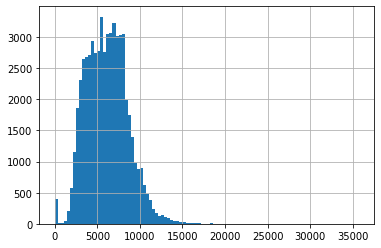

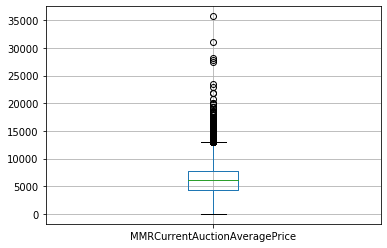

In [102]:
df['MMRCurrentAuctionAveragePrice'].hist(bins=100)
plt.show()

boxplot = df.boxplot(column=['MMRCurrentAuctionAveragePrice'])

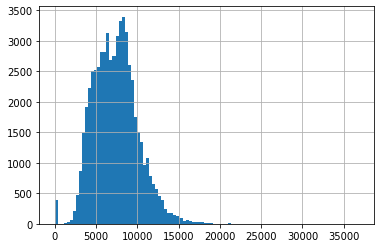

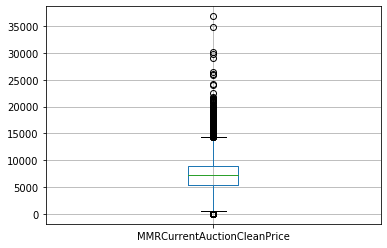

In [103]:
df['MMRCurrentAuctionCleanPrice'].hist(bins=100)
plt.show()

boxplot = df.boxplot(column=['MMRCurrentAuctionCleanPrice'])

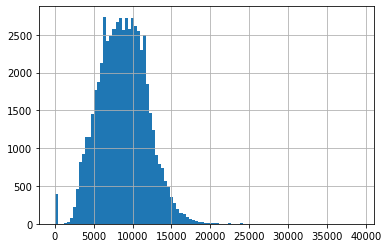

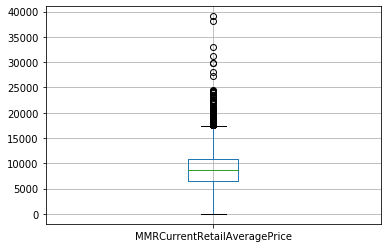

In [104]:
df['MMRCurrentRetailAveragePrice'].hist(bins=100)
plt.show()

boxplot = df.boxplot(column=['MMRCurrentRetailAveragePrice'])

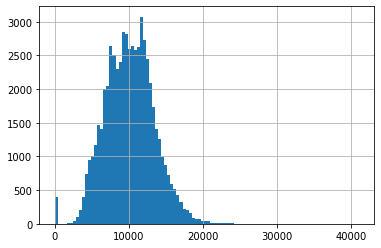

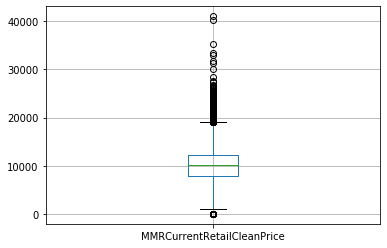

In [105]:
df['MMRCurrentRetailCleanPrice'].hist(bins=100)
plt.show()

boxplot = df.boxplot(column=['MMRCurrentRetailCleanPrice'])

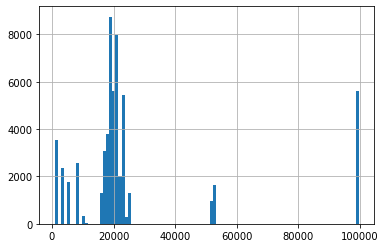

In [106]:
df['BYRNO'].hist(bins=100)

In [107]:
pclass_xt = pd.crosstab(df['VNZIP1'], df['VNST'])
pclass_xt

VNST,AL,AR,AZ,CA,CO,FL,GA,IA,ID,IL,...,OK,OR,PA,SC,TN,TX,UT,VA,WA,WV
VNZIP1,,,,,,,,,,,,,,,,,,,,,
2764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16066,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
16137,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
17028,0,0,0,0,0,0,0,0,0,0,...,0,0,29,0,0,0,0,0,0,0
17406,0,0,0,0,0,0,0,0,0,0,...,0,0,118,0,0,0,0,0,0,0
17545,0,0,0,0,0,0,0,0,0,0,...,0,0,112,0,0,0,0,0,0,0


In [108]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

VNST,AL,AR,AZ,CA,CO,FL,GA,IA,ID,IL,...,OK,OR,PA,SC,TN,TX,UT,VA,WA,WV
VNZIP1,,,,,,,,,,,,,,,,,,,,,
2764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


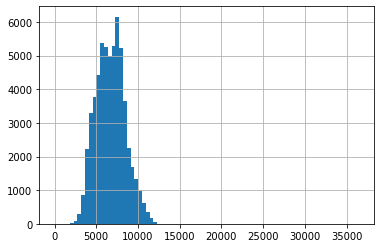

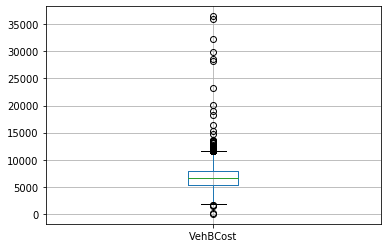

In [109]:
df['VehBCost'].hist(bins=80)
plt.show()

boxplot = df.boxplot(column=['VehBCost'])

In [111]:
df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost;;;;;;;;;;;;,WheelTypeIDVV
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D;SEDAN;EX,...,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533;;;;;;;;;,2
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS;V6;2.7L;V6;M,SXT,4D;SEDAN;SXT;FFV,...,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630;;;;;,2
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D;WAGON,...,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693;;;;;;;;;;;,2
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR;FWD;V6;3.9L,S,PASSENGER;3.9L,...,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633;;;;;;;;,2
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN;&;COUNTRY;FWD;V,Bas,MINIVAN;3.3L,...,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623;;;;;;;,1
5,62522,0,4/22/2009,ADESA,2007,2,KIA,SPECTRA;2.0L;I4;EFI,EX,4D;SEDAN;EX,...,6143.0,NaN,NaN,21053,85226,AZ,5430.0,0,462;;;;;;,2
6,1653,0,5/21/2010,ADESA,2005,5,NISSAN,ALTIMA,Bas,4D;SEDAN,...,11377.0,NaN,NaN,5546,34203,FL,7675.0,0,723;;;;;;;;;,2
7,40878,0,9/24/2009,MANHEIM,2008,1,DODGE,AVENGER;4C;2.4L;I4;S,SE,4D;SEDAN,...,12554.0,NaN,NaN,99740,29532,SC,7810.0,0,920;;;;;;;,2
8,55149,0,7/6/2010,MANHEIM,2006,4,SUZUKI,FORENZA,NaN,4D;SEDAN,...,8216.0,NaN,NaN,20234,97217,OR,5870.0,0,462;;;;;;;;;;,2
9,7255,0,6/4/2009,MANHEIM,2006,3,SUZUKI,FORENZA;2.0L;I4;EFI,NaN,4D;SEDAN,...,5756.0,NaN,NaN,18880,30272,GA,4825.0,0,505;;;;;;;,2
